In [124]:
# Libraries and constants
import numpy as np
import matplotlib.pyplot as plt 
import time 
from sklearn import linear_model
from termcolor import colored
import pandas as pd

max = 100
tests = 10000

In [125]:
# Testing functions
def crete_data(features,samples):

    X = np.random.rand(samples,features)
    w = np.random.rand(features)
    b = np.full(samples,np.random.rand())
    erro = np.random.rand(samples)

    y = X@w + b + erro

    # xw + b = y
    return X , y

def div(listA , listB):
    resp = []
    for i in range(len(listA)):
        resp += [listA[i]/listB[i]]
    return resp 

def test_algorithns( objs , samples ):

    data = {}

    percentage=1

    for i in range(samples) :
        
        if ( 100 * ( (i+1) / samples ) >= 10*percentage ) : 
            print(colored("    ",on_color="on_blue"),end="",flush=True)
            percentage+=1

        n = np.random.randint(1,max)
        m = np.random.randint(1,max)
        
        x , y = crete_data(n,m)

        data[i] = { "Samples" : m , "Features" : n }

        for j in objs :

            temp = {}

            start = time.time()
            objs[j].fit(x,y)
            duration = time.time() - start

            temp["Time"] = duration

            # Detalhe importante sobre o intercepto
            
            y_found = objs[j].predict(x)
            score = np.linalg.norm(y_found - y)

            temp["Score"] = score

            temp = pd.DataFrame.from_dict(temp,orient="index")
            data[i][j] = temp


    print()
    resp = pd.DataFrame.from_dict(data,orient="index")
    resp.to_excel("Regressions.xlsx")
    return resp

In [130]:
# Grafical Function

def describe(nparray):
    print(f'Mean: {np.mean(nparray)}')
    print(f'Std: {np.std(nparray)}')
    print(f'Min: {np.min(nparray)}')
    print(f'Max: {np.max(nparray)}')
    return 

def plot_data_3d(x1 , x2 , y , z , title):
    
    plt.scatter(div(x1,x2), y, c=z, cmap='magma')
    plt.title(title)
    plt.xlabel("Proportions - (m/n)")
    plt.ylabel("Scores - ||y_found - y_real||")
    plt.colorbar(label='Time of execution - seconds')
    plt.show()

    plt.scatter(div(x2,x1), y, c=z, cmap='magma')
    plt.title(title)
    plt.xlabel("Proportions - (n/m)")
    plt.ylabel("Scores - ||y_found - y_real||")
    plt.colorbar(label='Time of execution - seconds')
    plt.show()

    return 

In [127]:
# main 
objs = { "Least Squares" : linear_model.LinearRegression(),
        "Gradient Descent" : linear_model.SGDRegressor(),
        "Ridge" : linear_model.Ridge(), 
        "Adaptive Gradient Descent" : linear_model.SGDRegressor(learning_rate="adaptive") }

print("| Os codigos comecaram a ser testados! |")
df = test_algorithns( objs ,tests)
print("| Os codigos acabaram de ser testados! |")

| Os codigos comecaram a ser testados! |
                                        
| Os codigos acabaram de ser testados! |


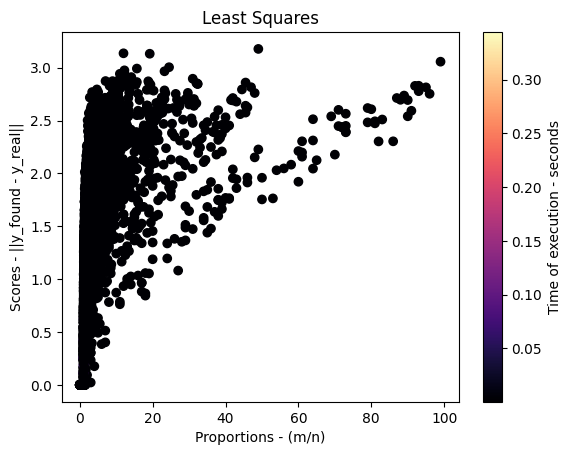

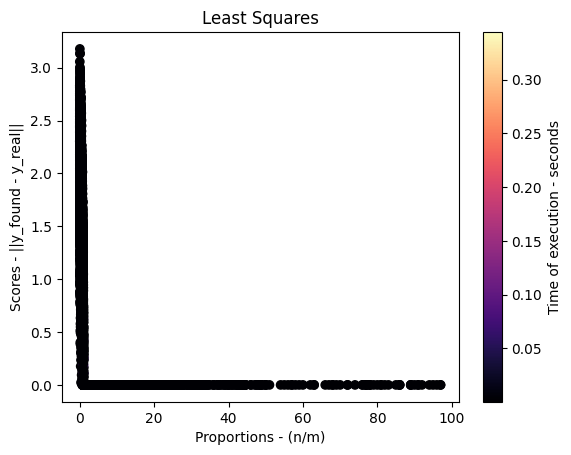


Least Squares Scores describe:
Mean: 0.7185774968035891
Std: 0.875597851440516
Min: 0.0
Max: 3.1769824638754627

Least Squares Times describe:
Mean: 0.000980095386505127
Std: 0.005128029003448134
Min: 0.0003237724304199219
Max: 0.34409379959106445


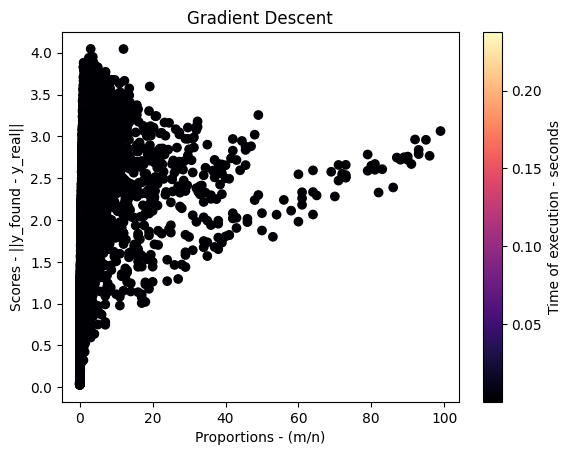

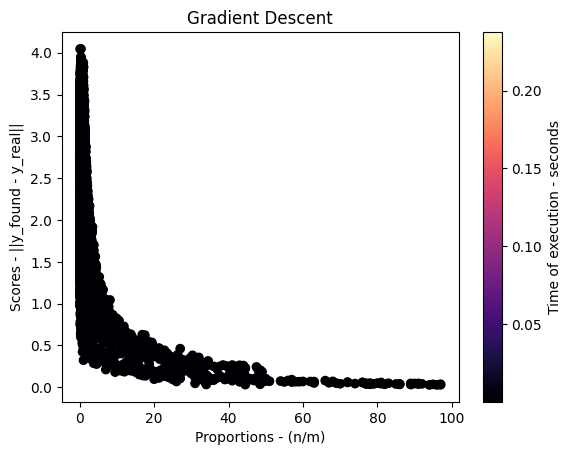


Gradient Descent Scores describe:
Mean: 2.2707710861232657
Std: 0.8926848730572833
Min: 0.027929483904163277
Max: 4.045296286207242

Gradient Descent Times describe:
Mean: 0.000869163179397583
Std: 0.0024465788179285687
Min: 0.0003077983856201172
Max: 0.23750066757202148


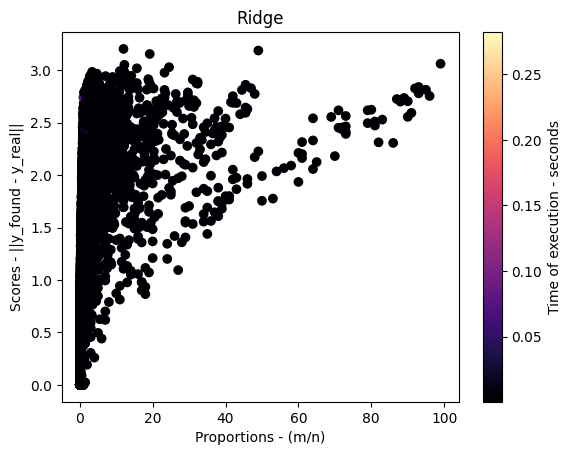

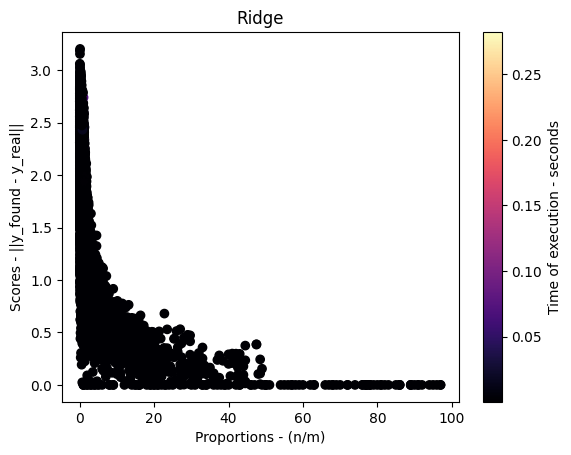


Ridge Scores describe:
Mean: 1.654416131463675
Std: 0.6608456969250021
Min: 0.0
Max: 3.2037758001442103

Ridge Times describe:
Mean: 0.0009741420269012451
Std: 0.004653062949709364
Min: 0.00036787986755371094
Max: 0.2821378707885742


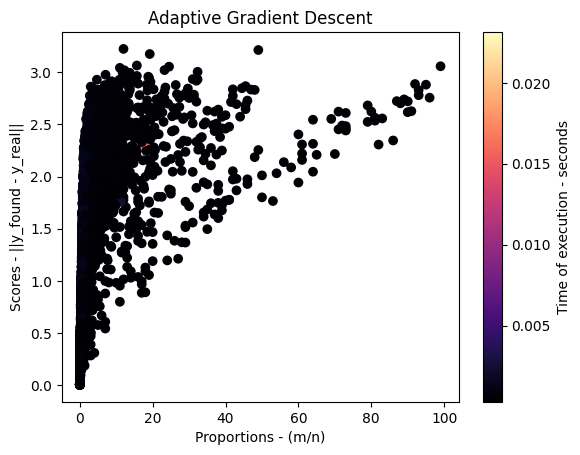

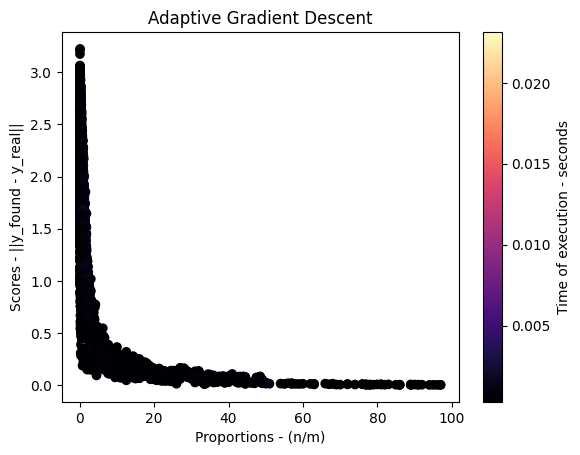


Adaptive Gradient Descent Scores describe:
Mean: 1.3156381989381098
Std: 0.708182987368048
Min: 0.0023416532823219427
Max: 3.2231618806193167

Adaptive Gradient Descent Times describe:
Mean: 0.0008507158041000366
Std: 0.0007238588539509968
Min: 0.0002980232238769531
Max: 0.023131847381591797


In [131]:
# desenha os graficos
for algorithm in objs:
    Scores = np.array([ subdf[0]["Score"] for subdf in df[algorithm]])
    Times = np.array([ subdf[0]["Time"] for subdf in df[algorithm]])
    plot_data_3d( df["Samples"] , df["Features"] , Scores , Times , algorithm )
    print(f'\n{algorithm} Scores describe:')
    describe(Scores)
    print(f'\n{algorithm} Times describe:')
    describe(Times)